In [145]:
import albumentations as A
import cv2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch

from pathlib import Path
from PIL import Image
import random
from torchvision import transforms
plt.style.use('dark_background')

In [146]:
print(A.__version__)

0.5.2


In [147]:
data_root = Path('/opt/ml/input/data/train_dataset')
image_root = data_root / 'images'
level_txt = data_root / 'level.txt'
source_txt = data_root / 'source.txt'
gt_txt = data_root / 'gt.txt'
tokens_txt = data_root / 'tokens.txt'
extra_latext_txt = '/opt/ml/input/data/json/extra_latex.txt'

In [148]:
gt_f = open(gt_txt)
gts = [line.strip().split('\t') for line in gt_f.readlines()]

level_f = open(level_txt)
levels = [line.strip().split('\t') for line in level_f.readlines()]
levels = [(x, int(y)) for x, y in levels]

source_f = open(source_txt)
sources = [line.strip().split('\t') for line in source_f.readlines()]
sources = [(x, int(y)) for x, y in sources]

In [149]:
level_words = {
    1:'초등',
    2: '중등', 
    3: '고등', 
    4: '대학', 
    5: '대학 이상'
}

source_words = {
    0: '출력물',
    1: '손글씨'
}

In [150]:
searching_ans = r'1 2 4 \times 4'

found = False
for i in range(len(gts)):
    if gts[i][1] == searching_ans:
        print(f'found {i}')
        found = True
        break
if found:
    search = gts[i][0]
    print(f'{levels[i][0]}\tlevel: {levels[i][1]}\t{level_words[levels[i][1]]}')
    print(f'{sources[i][0]}\tsource: {sources[i][1]}\t{source_words[sources[i][1]]}')
    print(sources[i])
else:
    search = None
print(search)

found 2150
train_02150.jpg	level: 4	대학
train_02150.jpg	source: 1	손글씨
('train_02150.jpg', 1)
train_02150.jpg


In [151]:
search = None

if search is None:
    a = list(image_root.glob('*'))
else:
    a = list(image_root.glob(search))
max_len = len(a)

old_images = []

In [194]:
use_new_index = False
use_album = True

h = 128
w = 128

if use_album:
    transform = A.Compose([
    #     A.RandomCrop(width=256, height=256),
    #     A.HorizontalFlip(p=0.5),

            A.Resize(h, w, always_apply=True),
            A.CLAHE(always_apply=True),
            A.ToGray(always_apply=True),

    #     A.Sharpen(alpha=(1, 1), lightness=(1, 1.0), always_apply=True),
    ])
else:
    transform = transforms.Compose(
        [
            transforms.Resize((h)),
        ]
    )

n_col = 10
n_col = min(n_col, len(a))
# Read an image with OpenCV and convert it to the RGB colorspace
original_images = []
transformed_images = []

if use_new_index:
    old_images = []
else:
    original_images = old_images
for i in range(n_col):
    if use_new_index:
        idx = random.randint(0, max_len-1)
        if use_album:
            image = cv2.imread(str(a[idx]))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        else:
            image = Image.open(str(a[idx]))

        original_images.append(image)
        old_images.append(image)

        if use_album:
            transformed = transform(image=image)
            transformed_image = transformed["image"]
        else:
            transformed_image = transform(image)     
    else:
        if use_album:
            transformed = transform(image=old_images[i])
            transformed_image = transformed["image"]
        else:
            transformed_image = transform(image)
    transformed_images.append(transformed_image)

fig, axes = plt.subplots(n_col, 2, figsize=(20, 30))

for i in range(n_col):
    if n_col == 1:
        axes[0].imshow(original_images[i])
        axes[1].imshow(transformed_images[i])
    else:
        axes[i][0].imshow(original_images[i])
        axes[i][1].imshow(transformed_images[i])
    
plt.show()

IndexError: list index out of range

In [172]:
import math

In [175]:
32*32/T

0.0625

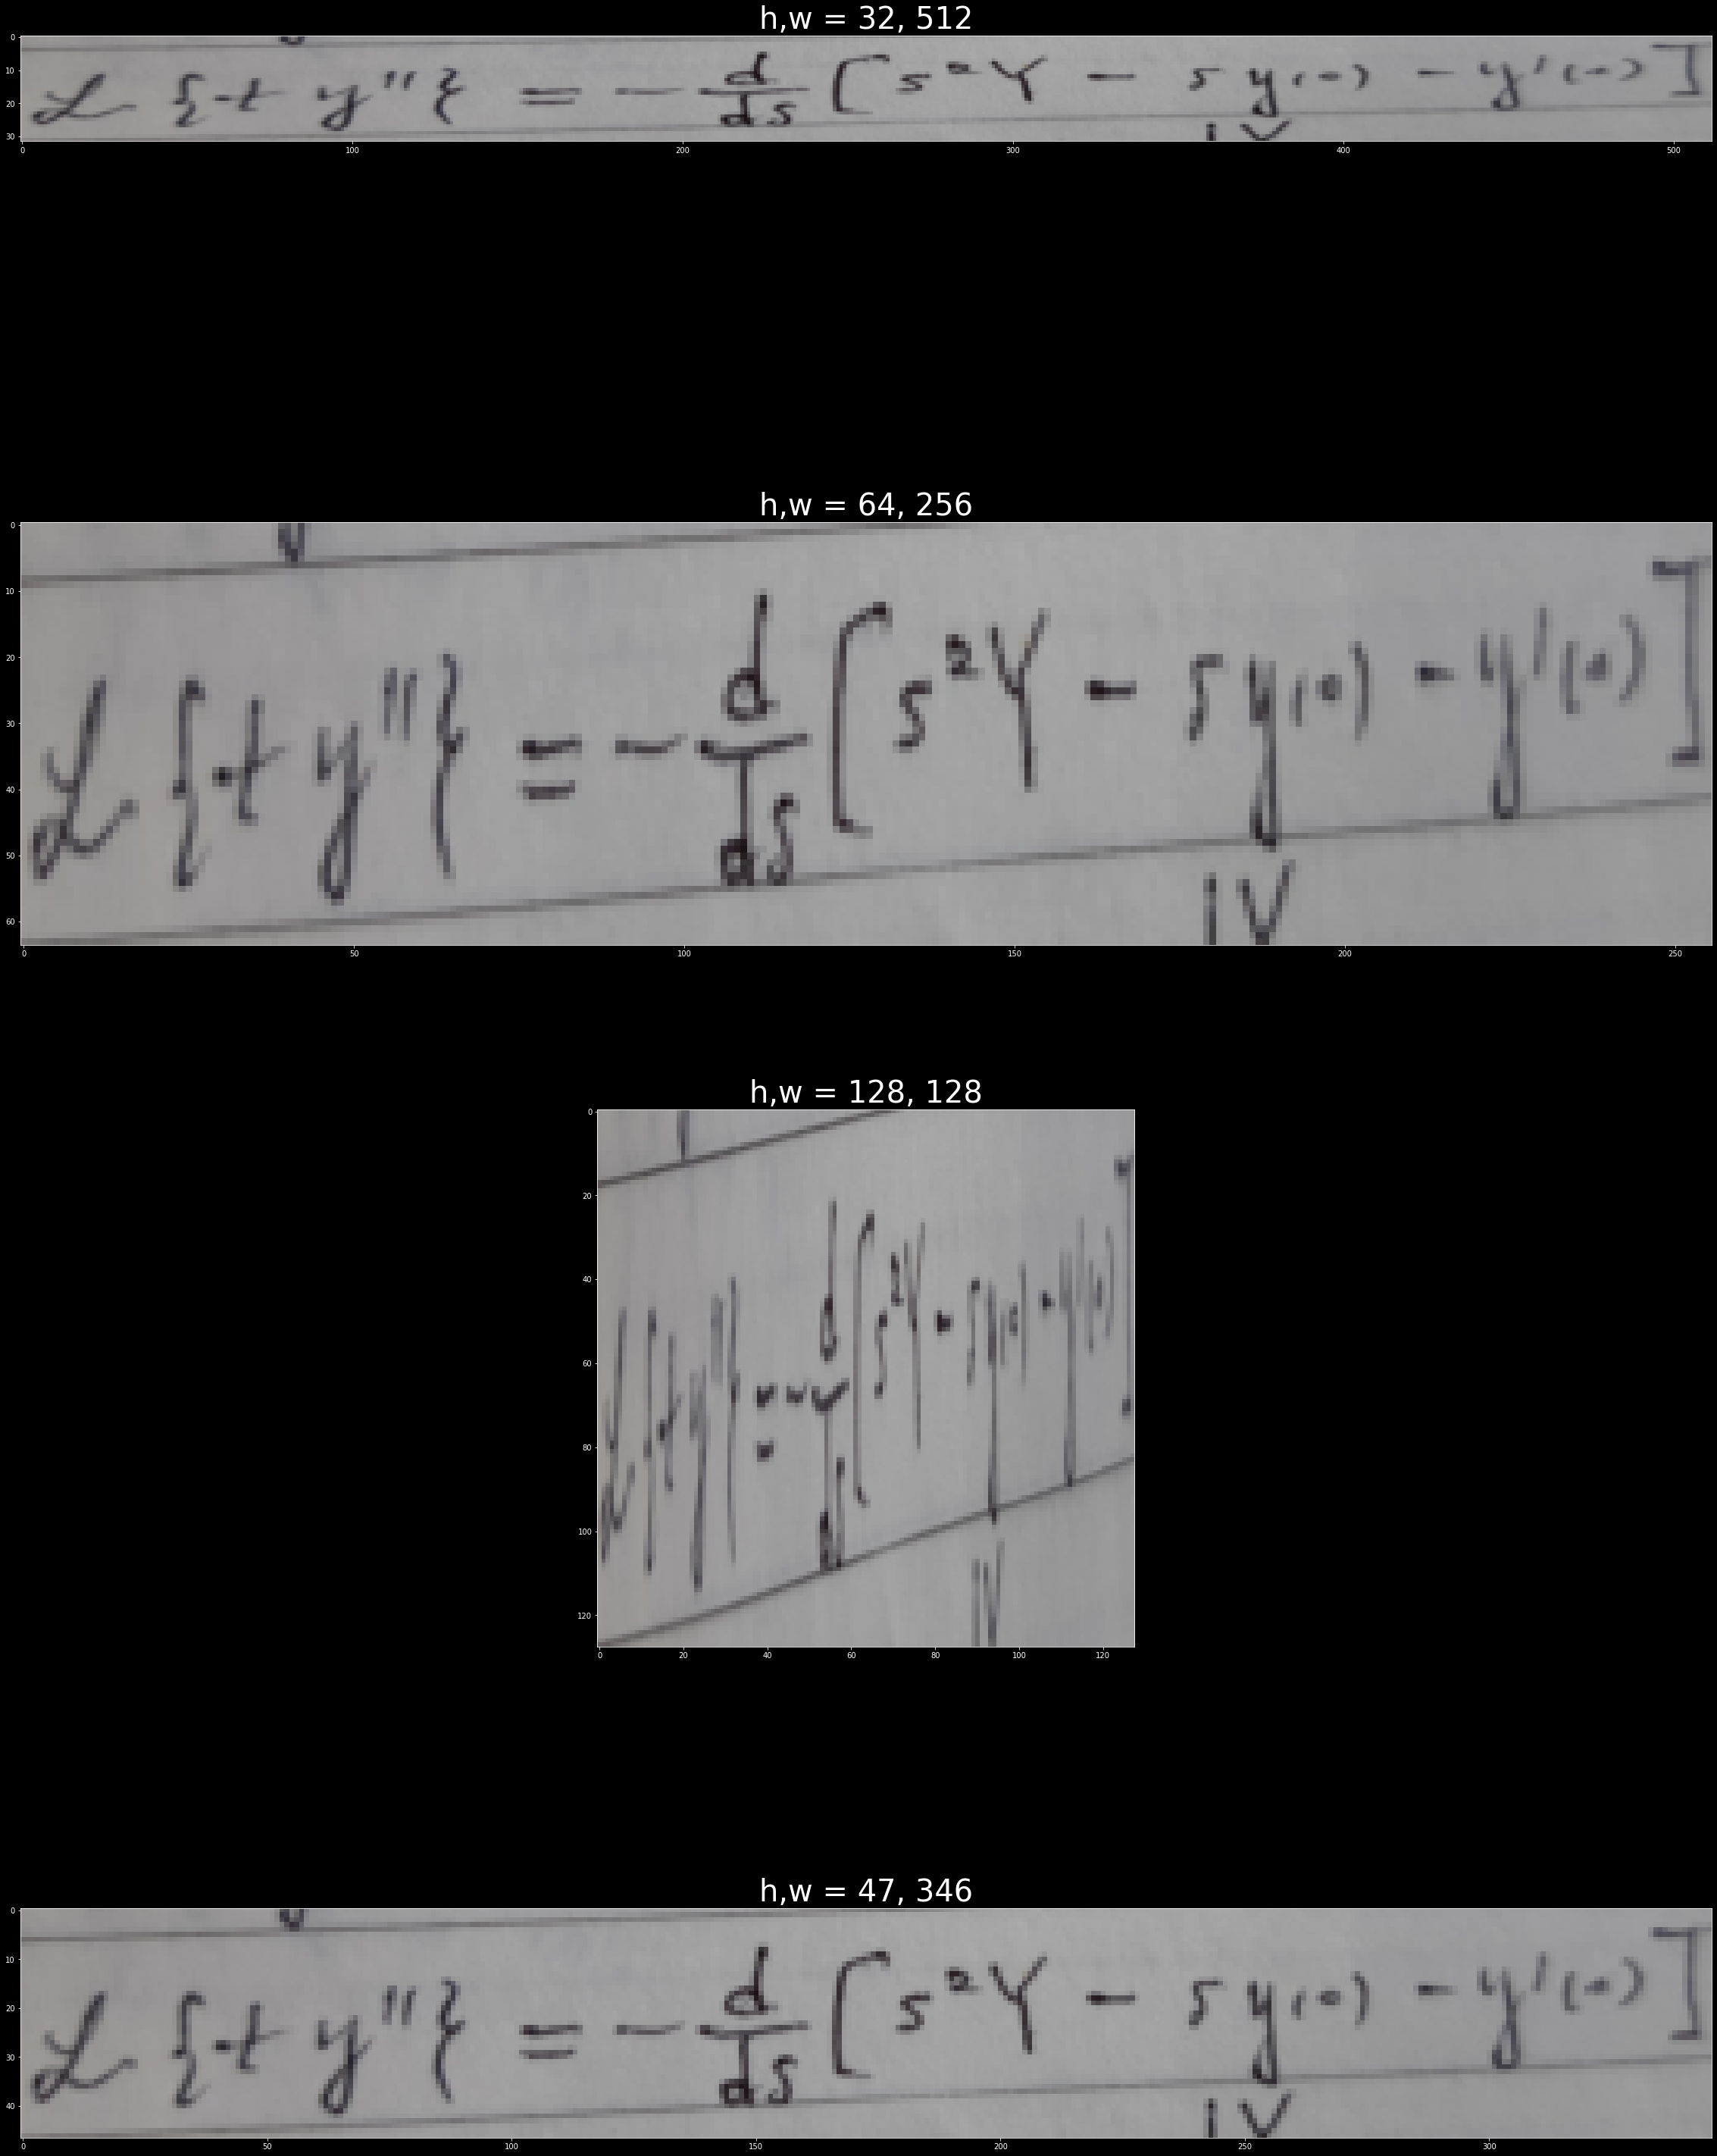

In [209]:
use_new_index = True

T = 128 * 128
hs = [32, 64, 128]

if use_new_index:
    idx = random.randint(0, max_len-1)
    image = Image.open(str(a[idx]))
    old_st = image
else:
    image = old_st
    
fig, axes = plt.subplots(len(hs) + 1, 1, figsize=(40, 60))
    
for i in range(len(hs) + 1):
    if i == len(hs):
        rw, rh = image.size
        div = rw * rh / T
        w = round(rw/math.sqrt(div))
        h = round(rh/math.sqrt(div))

    else:
        h = hs[i]
        w = T // h
    
    transform = transforms.Compose(
        [
            transforms.Resize((h, w)),
        ]
    )

    transformed_image = transform(image)
   
    axes[i].imshow(transformed_image)
    axes[i].set_title(f'h,w = {h}, {w}', fontsize=40)
    
plt.show()

In [198]:
47 * 345

16215

In [190]:
128*128

16384